In [1]:
from scipy.integrate import quad

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def f(x):
    return np.exp(-np.power(x, 2) / 2)

def prob(f, r):
    int1, _ = quad(f, -np.inf, 2*r)
    int2, _ = quad(f, -np.inf, 0)
    result = int1 - int2
    result = 1 / (np.sqrt(2 * np.pi)) * result
    
    return result

In [71]:
prob(f, 10)

0.50000000000000011

In [47]:
data = np.load("embeddings.npy")

(array([   53.,   361.,  1288.,  2666.,  3469.,  3032.,  1720.,   535.,
           98.,    11.]),
 array([-0.29460859, -0.23490237, -0.17519614, -0.11548992, -0.05578369,
         0.00392254,  0.06362876,  0.12333499,  0.18304121,  0.24274744,
         0.30245367]),
 <a list of 10 Patch objects>)

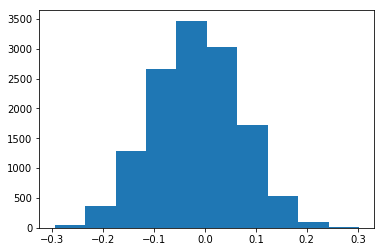

In [129]:
plt.hist(data[:, 127])

**Распределение норм каждого вектора**

(array([   12.,    86.,   460.,  1777.,  3581.,  4006.,  2412.,   757.,
          131.,    11.]),
 array([ 0.99999959,  0.99999967,  0.99999974,  0.99999982,  0.9999999 ,
         0.99999997,  1.00000005,  1.00000013,  1.0000002 ,  1.00000028,
         1.00000035]),
 <a list of 10 Patch objects>)

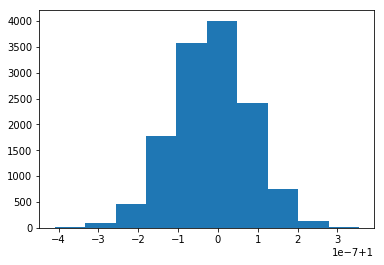

In [62]:
y_norm = np.linalg.norm(data, axis=1)

plt.hist(y_norm)

In [146]:
np.mean(y_norm), np.var(y_norm)

(0.9999999845398877, 9.1166199692104144e-15)

In [143]:
r_norm = y_norm / 2

In [147]:
np.mean(r_norm), np.var(r_norm)

(0.49999999226994385, 2.2791549923026036e-15)

(array([   12.,    86.,   460.,  1777.,  3581.,  4006.,  2412.,   757.,
          131.,    11.]),
 array([ 0.4999998 ,  0.49999983,  0.49999987,  0.49999991,  0.49999995,
         0.49999999,  0.50000002,  0.50000006,  0.5000001 ,  0.50000014,
         0.50000018]),
 <a list of 10 Patch objects>)

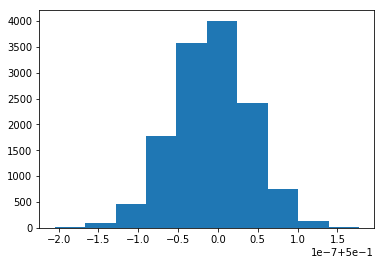

In [144]:
plt.hist(r_norm)

In [102]:
probs = np.ndarray(len(r_norm))

percent = len(r_norm) / 100
percent = int(np.floor(percent))

k = 0
cnt = 0

for i in r_norm:
    if k % (10 * percent) == 0:
        print("{}%".format(int(k / percent)))
    k += 1
    
    np.append(probs, prob(f, i))

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [110]:
probs = np.around(probs, decimals=12)

Mean 0.0


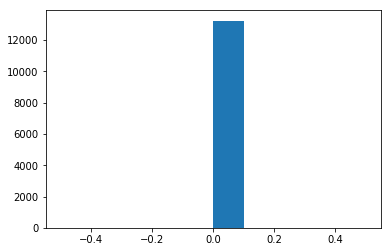

In [113]:
plt.hist(probs)

print("Mean", np.mean(probs))